## نموذج الانحدار الخطي :  

In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/houseprice2.csv")

In [ ]:
# تحديد المتغيرات  والهدف 
X=df.Scaled_OverallQal.values.reshape(-1,1)
y=df.Scaled_SalePrice.values.reshape(-1,1)



In [ ]:
# تقسيم البيانات 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.3, random_state=42)

In [ ]:
# تحميل النموذج
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [ ]:
# تدريب البيانات 
  lreg.fit(X_train, y_train)

In [ ]:
# التنبؤ
y_pred=lreg.predict(X_test)

In [ ]:
  print(f" Score  : {lreg.score(X_test, y_test):.3f}")

In [ ]:
# القياس 
print(f" MAE  : {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f" MSE  : {metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f" RMSE  : {np.sqrt(metrics.r2_score(y_test, y_pred)):.3f}")


 Score  : 0.680
 MAE  : 0.430
 MSE  : 0.311
 RMSE  : 0.825


In [ ]:
lreg.coef_ , lreg.intercept_

(array([[0.82324977]]), array([0.00021087]))

In [ ]:
df_pred=pd.DataFrame( {"Actual_P": y_test.ravel(), "Predicted_P": y_pred.ravel() })

In [ ]:
# إظهار تنيجة التنبؤ 
df_pred.head()

,Actual_P,Predicted_P
0,0.248,0.542
1,0.247,0.542
2,-0.349,-0.657
3,-0.930,-0.657
4,-1.718,-1.257


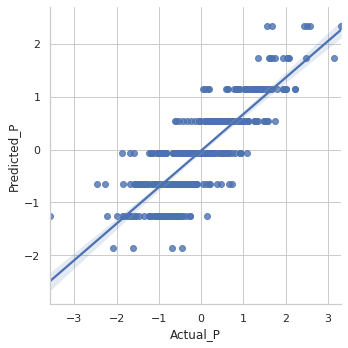

In [ ]:
# الرسم البياني لأسعار العقارات الأصلية وتلك التي تم التنبؤ بها
import seaborn as sns
# sns.set()
_=sns.lmplot("Actual_P",  "Predicted_P", data=df_pred)

In [ ]:
# إذا ما أردنا تحديد السعر الحقيقي 
df_pred[" Unscaled_Pred_Price"]=scaler.inverse_transform(df_pred[["Predicted_P"]])

In [ ]:
df_pred.sample(4)

,Actual_P,Predicted_P,Unscaled_Pred_Price
126,1.472,1.142,12.479
56,0.615,0.542,12.240
158,2.470,1.741,12.718
100,0.399,0.542,12.240


In [ ]:
pd.DataFrame({
    "Original_Price": np.expm1(scaler.inverse_transform(df_pred.Actual_P)), 
    "Predicted_Price": np.expm1(scaler.inverse_transform(df_pred.Predicted_P)),
      })

,Original_Price,Predicted_Price
0,184000.0,206884.398
1,183900.0,206884.398
2,145000.0,128238.783
3,115000.0,128238.783
4,84000.0,100963.626
...,...,...
432,126175.0,79489.588
433,180500.0,128238.783
434,120500.0,100963.626
435,158000.0,128238.783


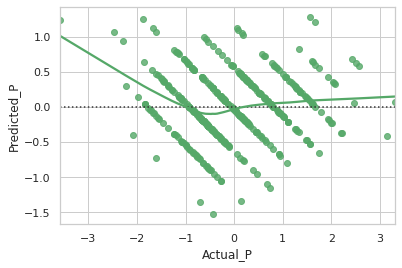

In [ ]:
# نخطيط البقايا
_=sns.residplot(df_pred.Actual_P, df_pred.Predicted_P, lowess=True, color="g")

In [ ]:
pip install scikit-plot 

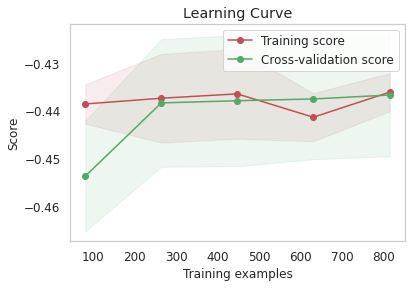

In [ ]:
# تخطيط التعلم 
import scikitplot as skplt

skplt.estimators.plot_learning_curve(lreg, X_t, y_t, scoring="neg_mean_absolute_error")

In [ ]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']